In [3]:
import  pandas as pd 
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
%matplotlib inline

<AxesSubplot:>

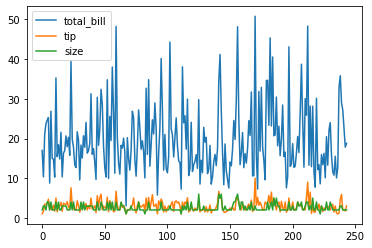

In [3]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

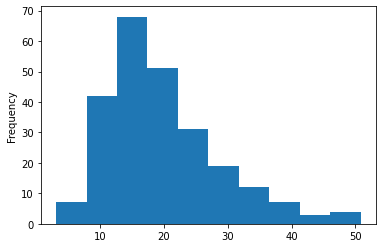

In [4]:
df['total_bill'].plot(kind = 'hist')

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

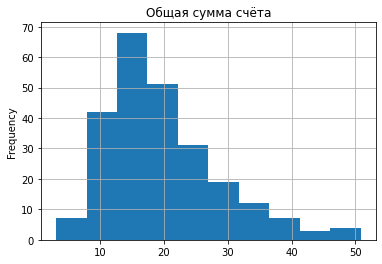

In [5]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

При работе с категориальными (нечисловыми) переменными с помощью метода plot, датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившейся series применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

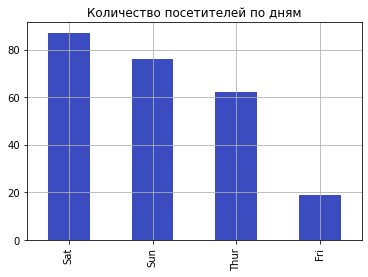

In [6]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

## Отображение двух показателей на графике
Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Размер'}, ylabel='Frequency'>],
      dtype=object)

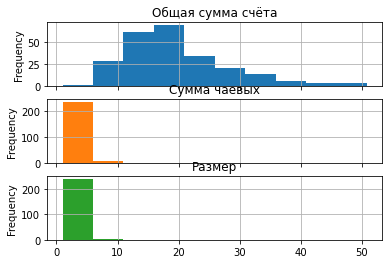

In [10]:
df[['total_bill', 'tip', 'size']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых', 'Размер'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

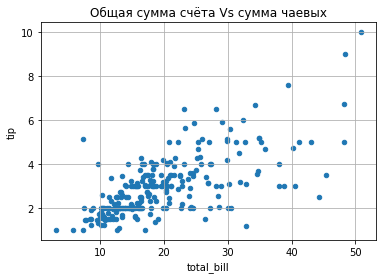

In [11]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

<AxesSubplot:xlabel='day'>

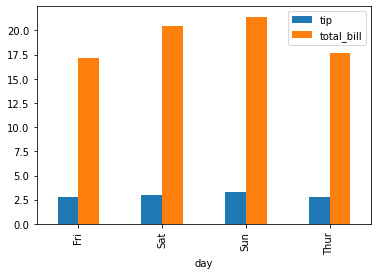

In [12]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

## Объектно-ориентированный подход

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

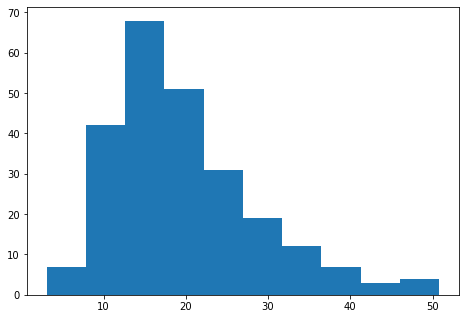

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

axes.set_title — заголовок диаграммы;
axes.set_ylabel — заголовок для оси ординат;
axes.set_xlabel — заголовок для оси абсцисс.

Text(0.5, 0, 'Сумма заказа, USD')

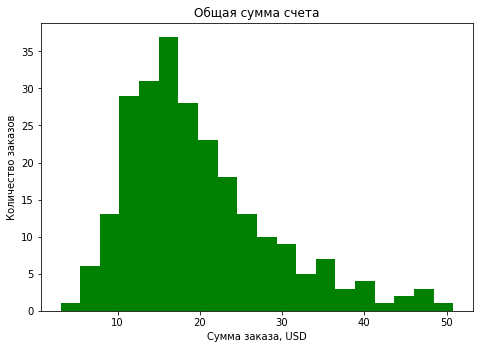

In [23]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

Text(0, 0.5, 'Размер чаевых')

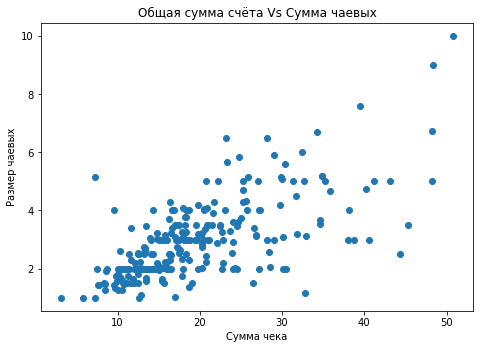

In [24]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

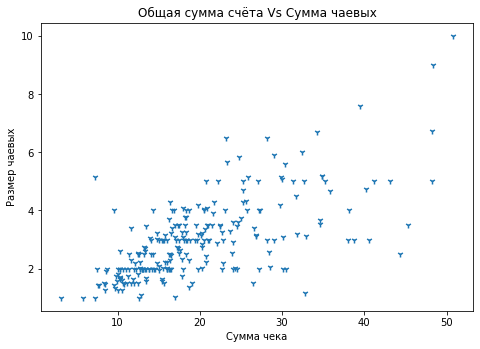

In [25]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '1')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

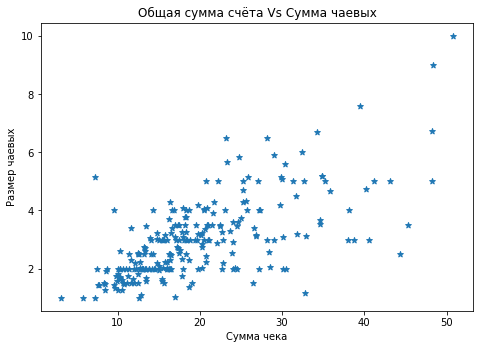

In [26]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '*')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

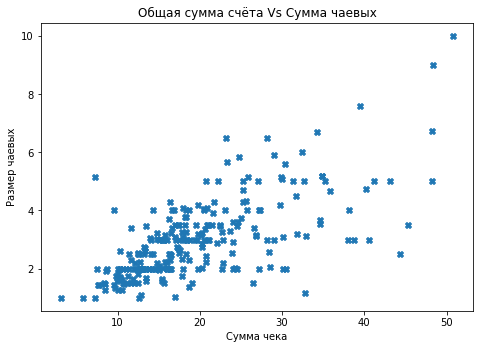

In [28]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'X')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

### Несколько систем координат
Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ слева и снизу, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Text(0, 0.5, 'Размер чаевых')

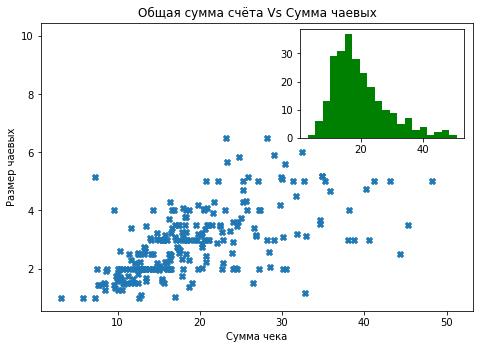

In [32]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
sec_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'X')
sec_axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [34]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

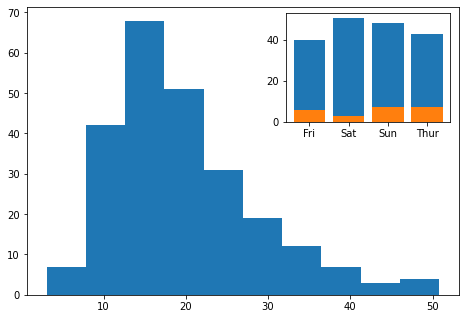

In [35]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

<BarContainer object of 4 artists>

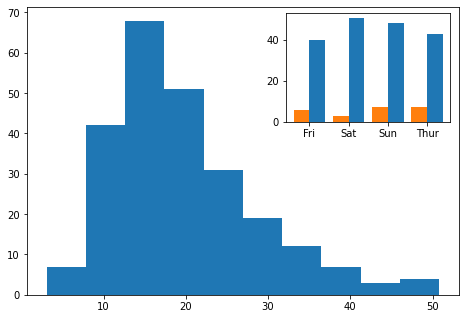

In [36]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

### Добавление легенды
Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

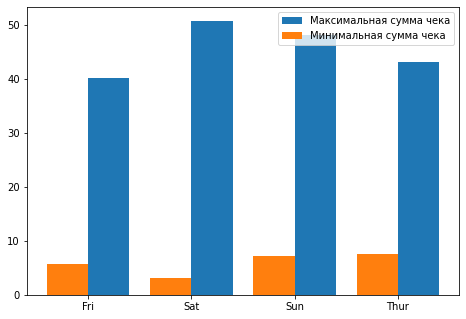

In [37]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

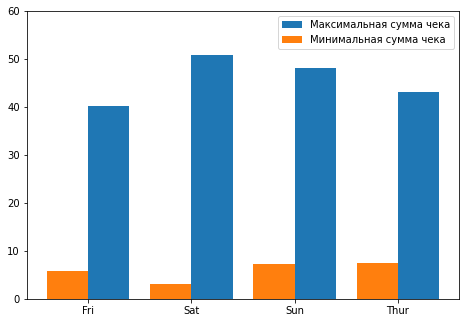

In [38]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

### Subplots
Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

In [51]:
fig, axes = plt.sublots(1,3, figsize =(12,4))
#axes[0].hist(df ['total_bill'])
#axes[0].set_title('Общая сумма счета')

AttributeError: module 'matplotlib.pyplot' has no attribute 'sublots'

## Создание линейных графиков


Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [4]:
import numpy as np 
#Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. 
x = np.linspace(start=-3., stop=3., num=1000)
#Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:
y1 = np.exp(x)
x

array([-3.        , -2.99399399, -2.98798799, -2.98198198, -2.97597598,
       -2.96996997, -2.96396396, -2.95795796, -2.95195195, -2.94594595,
       -2.93993994, -2.93393393, -2.92792793, -2.92192192, -2.91591592,
       -2.90990991, -2.9039039 , -2.8978979 , -2.89189189, -2.88588589,
       -2.87987988, -2.87387387, -2.86786787, -2.86186186, -2.85585586,
       -2.84984985, -2.84384384, -2.83783784, -2.83183183, -2.82582583,
       -2.81981982, -2.81381381, -2.80780781, -2.8018018 , -2.7957958 ,
       -2.78978979, -2.78378378, -2.77777778, -2.77177177, -2.76576577,
       -2.75975976, -2.75375375, -2.74774775, -2.74174174, -2.73573574,
       -2.72972973, -2.72372372, -2.71771772, -2.71171171, -2.70570571,
       -2.6996997 , -2.69369369, -2.68768769, -2.68168168, -2.67567568,
       -2.66966967, -2.66366366, -2.65765766, -2.65165165, -2.64564565,
       -2.63963964, -2.63363363, -2.62762763, -2.62162162, -2.61561562,
       -2.60960961, -2.6036036 , -2.5975976 , -2.59159159, -2.58

In [3]:
y1

array([ 0.04978707,  0.05008699,  0.05038872,  0.05069226,  0.05099764,
        0.05130485,  0.05161392,  0.05192484,  0.05223764,  0.05255232,
        0.0528689 ,  0.05318739,  0.0535078 ,  0.05383013,  0.05415441,
        0.05448064,  0.05480883,  0.05513901,  0.05547117,  0.05580533,
        0.05614151,  0.05647971,  0.05681995,  0.05716223,  0.05750658,
        0.05785301,  0.05820152,  0.05855213,  0.05890485,  0.0592597 ,
        0.05961668,  0.05997582,  0.06033712,  0.06070059,  0.06106626,
        0.06143413,  0.06180421,  0.06217652,  0.06255108,  0.06292789,
        0.06330698,  0.06368834,  0.06407201,  0.06445798,  0.06484628,
        0.06523692,  0.06562991,  0.06602527,  0.06642301,  0.06682315,
        0.0672257 ,  0.06763067,  0.06803808,  0.06844795,  0.06886029,
        0.06927511,  0.06969242,  0.07011226,  0.07053462,  0.07095952,
        0.07138699,  0.07181703,  0.07224966,  0.0726849 ,  0.07312276,
        0.07356326,  0.07400641,  0.07445223,  0.07490073,  0.07

Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений. Первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

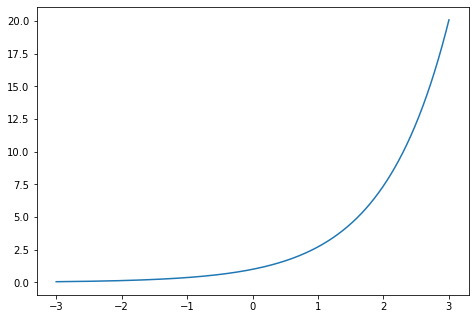

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

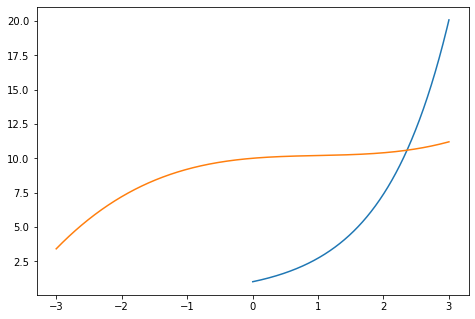

In [9]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Отрисуем линию в стиле "dashed line":

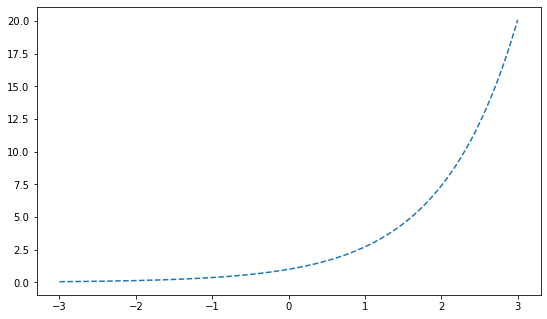

In [10]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

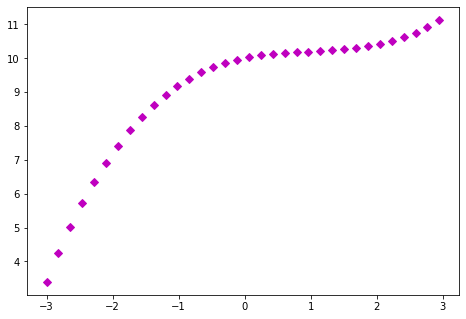

In [11]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

## Гистограммы распределения признаков

Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [14]:
import warnings; warnings.simplefilter('ignore')

Загружаем датасет tips.csv, с которым мы будем работать:

In [16]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Для построения гистограммы распределения количественных признаков в библиотеке Seaborn (версия 0.11.1) можно использовать метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

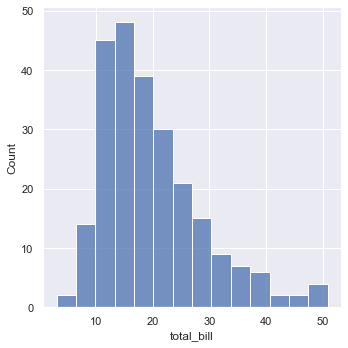

In [17]:
sns.set()
sns.displot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

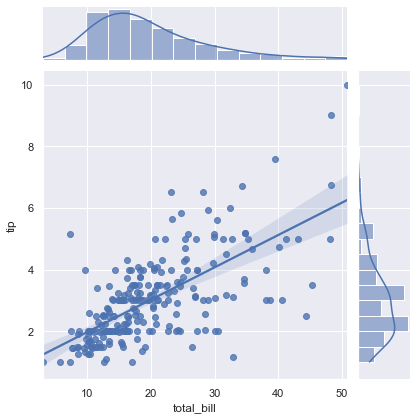

In [27]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot:

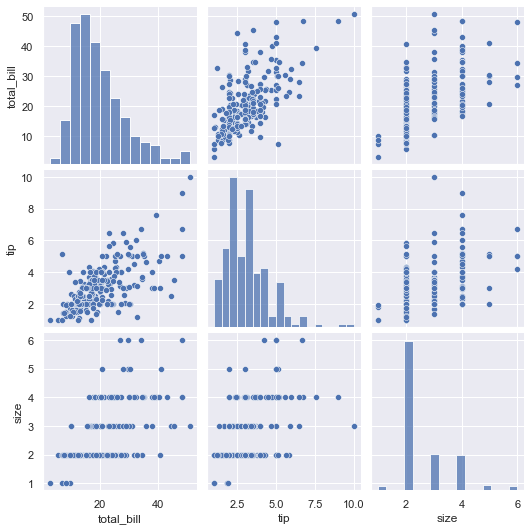

In [28]:
sns.pairplot(df)

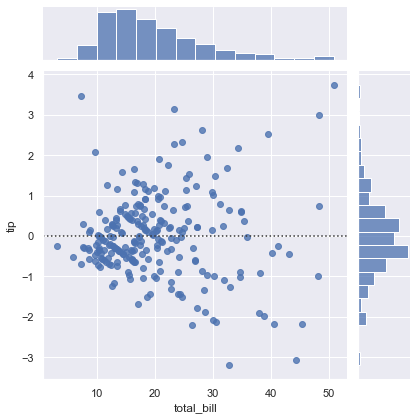

In [29]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'resid')

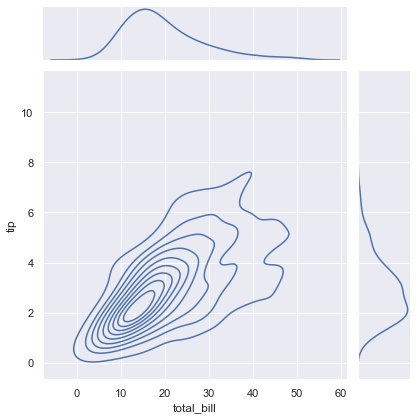

In [30]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'kde')

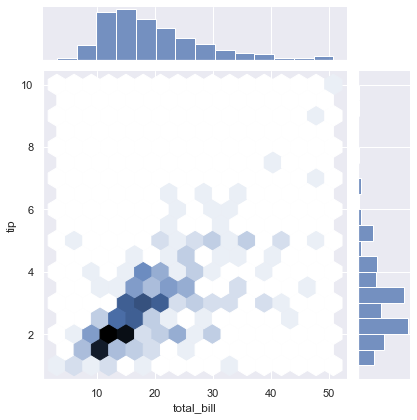

In [31]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex')

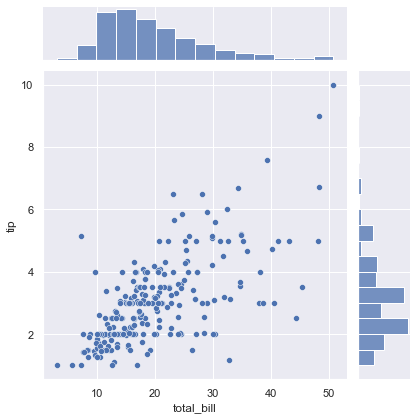

In [32]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'scatter')

## Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

<AxesSubplot:xlabel='day', ylabel='count'>

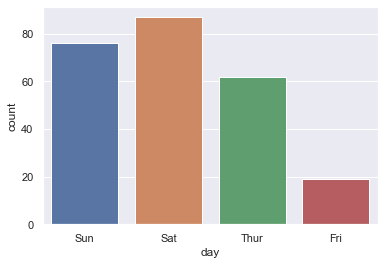

In [33]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

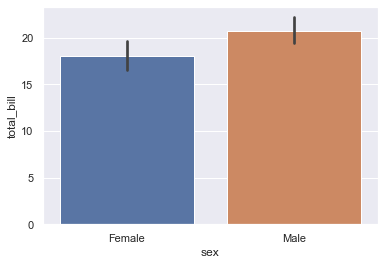

In [34]:
sns.barplot (x ='sex', y = 'total_bill', data=df)

Boxplots
Box plot — тип графика, компонентами которого являются:

   - Отрезок (Range), отражающий диапазон значений набора данных.
   -  Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
   -  Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквартильный интервал) — ширина прямоугольника от Q1 до Q3.
   - Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

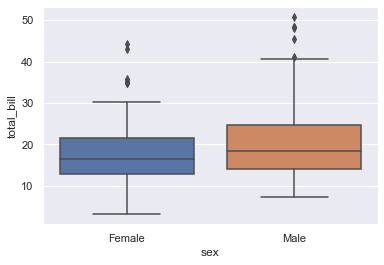

In [35]:
sns.boxplot (x ='sex', y = 'total_bill', data=df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue. Такой способ представления информации позволяет нам увидеть, как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

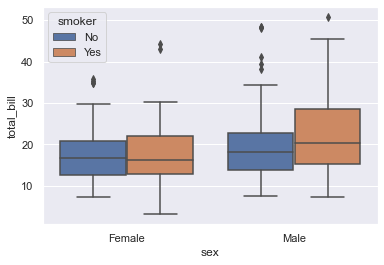

In [36]:
sns.boxplot (x ='sex', y = 'total_bill', data=df, hue = 'smoker')

## Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [8]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

<AxesSubplot:>

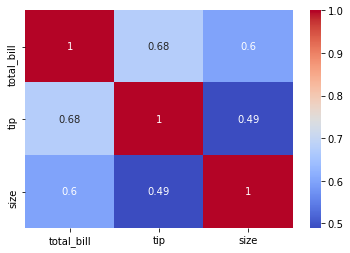

In [14]:
sns.heatmap (correlation, annot = True, cmap = 'coolwarm')

# Библиотека Plotly

Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.

In [15]:
!pip install plotly

In [16]:
#Для эффективного взаимодействия Plotly с датафреймами Pandas нам понадобится библиотека Cufflinks. Установите её командой:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=bfa89b541fee4461ef03d2b97daf09e55c42692f190c72b7d79b33becabcceb2
  Stored in directory: c:\users\olgas\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


Перед созданием интерактивных визуализаций импортируйте необходимые библиотеки:

In [17]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [18]:
init_notebook_mode(connected = True)
cf.go_offline()

In [19]:
df = pd.read_csv('tips.csv')

Для создания разных типов графиков в Pandas используется метод plot с различными настройками:

<AxesSubplot:>

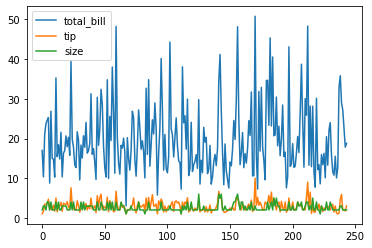

In [20]:
df.plot() #так было в пандас

In [21]:
#Для превращения графика в интерактивную визуализацию достаточно добавить в код всего одну букву:
df.iplot()

Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [22]:
df[['total_bill', 'tip']].iplot(kind = 'spread')

C:\Users\olgas\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

In [25]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')

# igraph

In [28]:
!pip install python-igraph

In [40]:
import igraph
from igraph import Graph, EdgeSeq
nr_vertices = 25
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

In [41]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

In [42]:
def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], # or replace labels with a different list for the text within the circle
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations

In [43]:
axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

fig.update_layout(title= 'Tree with Reingold-Tilford Layout',
              annotations=make_annotations(position, v_label),
              font_size=12,
              showlegend=False,
              xaxis=axis,
              yaxis=axis,
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'
              )
fig.show()

# Parallel Categories Diagram

In [44]:
import plotly.express as px

df = px.data.tips()
fig = px.parallel_categories(df)

fig.show()

In [60]:
df = pd.read_csv('chanel_steps.csv')
bq = df
bq.head()

,pipeline_name,lead_id,created_at,ga_date,real_source_ga_check,ga_campaign,ga_adContent,r_n,first_touch,second_touch,th_touch,four_touch,five_touch,six_touch,seven_touch,eight_touch,nine_touch,ten_touch
0,этой воронки нет в БД,18356369.0,2020-02-18,2019-12-14,SMM|Инстаграм лиды,lal_sk,video_1,1,SMM|Инстаграм лиды -> lal_sk -> video_1 (2019-...,Facebook Миллионники Performance -> pageview14...,SMM|Инстаграм лиды -> pageview14 -> video_herm...,Facebook Миллионники Performance -> pageview14...,SMM|Инстаграм лиды -> lal_cmo -> video_sale (2...,Facebook Миллионники Performance -> q_academy_...,Facebook Миллионники Performance -> q_academy_...,Facebook Миллионники Performance -> q_academy_...,Facebook Миллионники Performance -> q_academy_...,Facebook Миллионники Performance -> q_academy_...
1,этой воронки нет в БД,19127587.0,2020-03-09,2020-03-09,SMM|Инстаграм лиды,lal_adhive,video_roma,1,SMM|Инстаграм лиды -> lal_adhive -> video_roma...,SMM|Инстаграм лиды -> lal_2_adhive -> img_new ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,этой воронки нет в БД,19294947.0,2020-03-13,2020-03-13,SMM|Инстаграм лиды,lal_adhive,img_old,1,SMM|Инстаграм лиды -> lal_adhive -> img_old (2...,Facebook Миллионники Performance -> q_academy_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,этой воронки нет в БД,19529103.0,2020-03-18,2020-03-18,Performance|ВКонтакте,kalash,(not set),1,Performance|ВКонтакте -> kalash -> (not set) (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,этой воронки нет в БД,19744807.0,2020-03-21,2020-03-21,SMM|Инстаграм лиды,lal_cmo,video_new,1,SMM|Инстаграм лиды -> lal_cmo -> video_new (20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import plotly.express as px

bq = px.data.tips()
fig = px.parallel_categories(bq)

fig.show()